In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
df = pd.read_csv('DSGames/Games.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [51]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [53]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [54]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [55]:
df.drop(df.index[659],inplace = True)
df.drop(df.index[14245],inplace = True)
df.dropna(axis = 0, inplace = True)

In [56]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [57]:
df.drop(['Developer','Rating'],axis = 1, inplace = True)
df.drop(['Critic_Count','User_Count'], axis = 1, inplace = True)

In [58]:
df['Name'].isnull().sum()

0

In [59]:
df['Critic_Score'] = df['Critic_Score']*0.1

In [60]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,8
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,8.3


In [61]:
df.rename(columns = {'Year_of_Release':'Year'}, inplace = True)
df.rename(columns = {'NA_Sales':'NA'}, inplace = True)
df.rename(columns = {'EU_Sales':'EU'}, inplace = True)
df.rename(columns = {'JP_Sales':'JP'}, inplace = True)
df.rename(columns = {'Other_Sales':'Other'}, inplace = True)
df.rename(columns = {'Global_Sales':'Global'}, inplace = True)

In [62]:
df

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,User_Score
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,8
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,8.3
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,8
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.9,8.5
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,5.8,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,4.6,2.4
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,8.1,8.8
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,8.0,7.6
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,6.1,5.8


In [63]:
df_1 = pd.melt(df, id_vars = 'Year',var_name = 'Sales', value_name = 'Region')

In [64]:
df_1

,Year,Sales,Region
0,2006.0,Name,Wii Sports
1,2008.0,Name,Mario Kart Wii
2,2009.0,Name,Wii Sports Resort
3,2006.0,Name,New Super Mario Bros.
4,2006.0,Name,Wii Play
...,...,...,...
75070,2001.0,User_Score,2.4
75071,2002.0,User_Score,8.8
75072,2014.0,User_Score,7.6
75073,2011.0,User_Score,5.8


In [65]:
len(df_1)

75075

sb.replot(x = 'Year', y = 'Global', data = df, hue = df_1)

In [66]:
df_02 = df[['Year','NA', 'EU', 'JP', 'Other']]

In [67]:
df_03= df.groupby(['Year'])[['NA', 'EU', 'JP', 'Other']].sum().reset_index()

In [68]:
df_1 = pd.melt(df_03, id_vars = 'Year',var_name = 'Region', value_name = 'Sales')

In [69]:
df_1 = df_1.replace([np.inf, -np.inf], np.nan).dropna()

C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

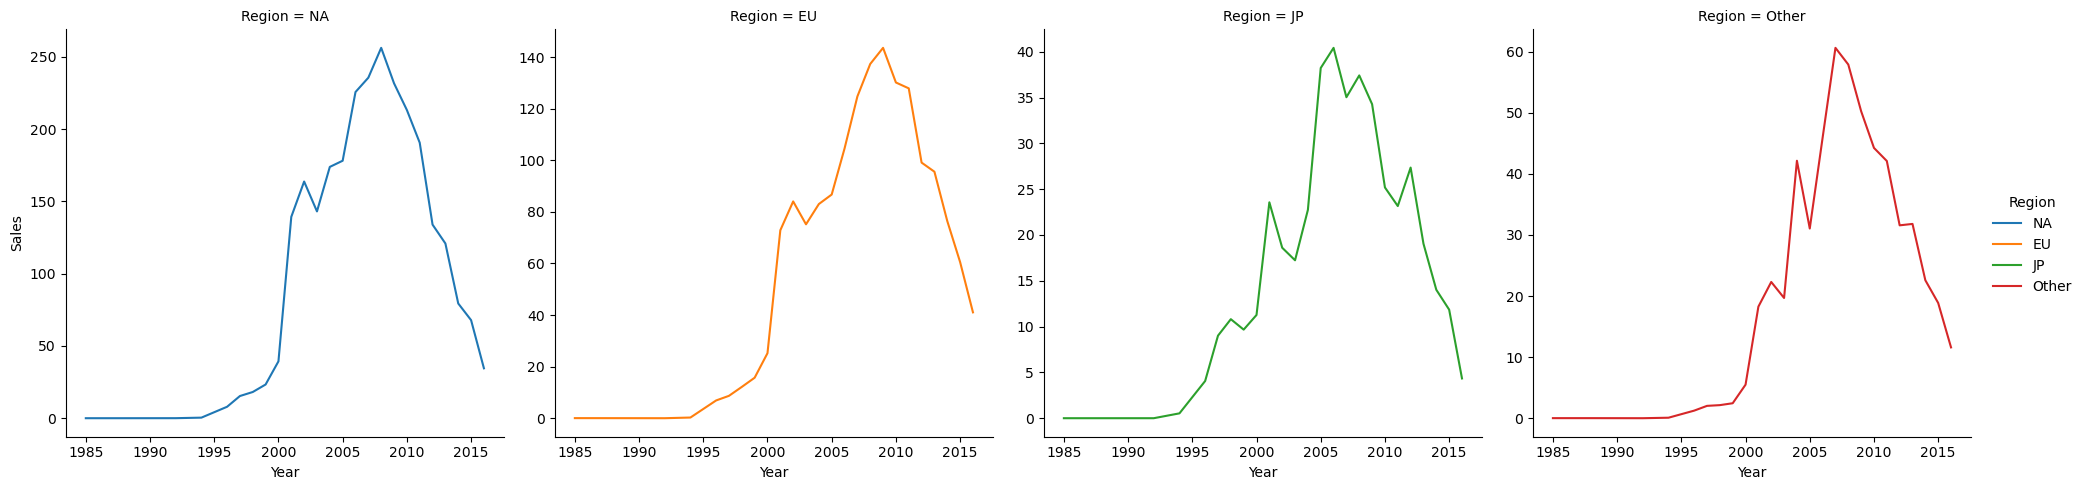

In [106]:
df_1 = df_1[np.isfinite(df_1['Year'])]
sns.relplot(x = 'Year', y = 'Sales', data = df_1, hue = 'Region', col = 'Region', kind='line',facet_kws={"sharey": False} )


In [107]:


a = df.groupby(['Genre','Year'])[['Global']].sum().reset_index()

In [108]:

len(a)

238

In [109]:
a

,Genre,Year,Global
0,Action,1996.0,10.71
1,Action,1997.0,1.99
2,Action,1998.0,15.27
3,Action,1999.0,9.38
4,Action,2000.0,15.40
...,...,...,...
233,Strategy,2012.0,1.92
234,Strategy,2013.0,4.78
235,Strategy,2014.0,0.40
236,Strategy,2015.0,1.35


C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: Line2D.set() got an unexpected keyword argument 'col'

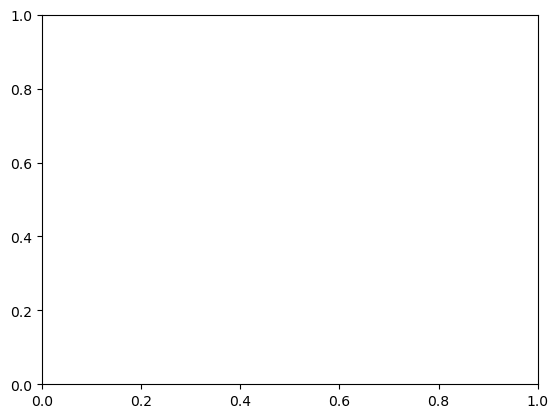

In [114]:

sns.lineplot(data=a,  x="Year", y = 'Global',hue="Genre", col = 'Genre')

C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

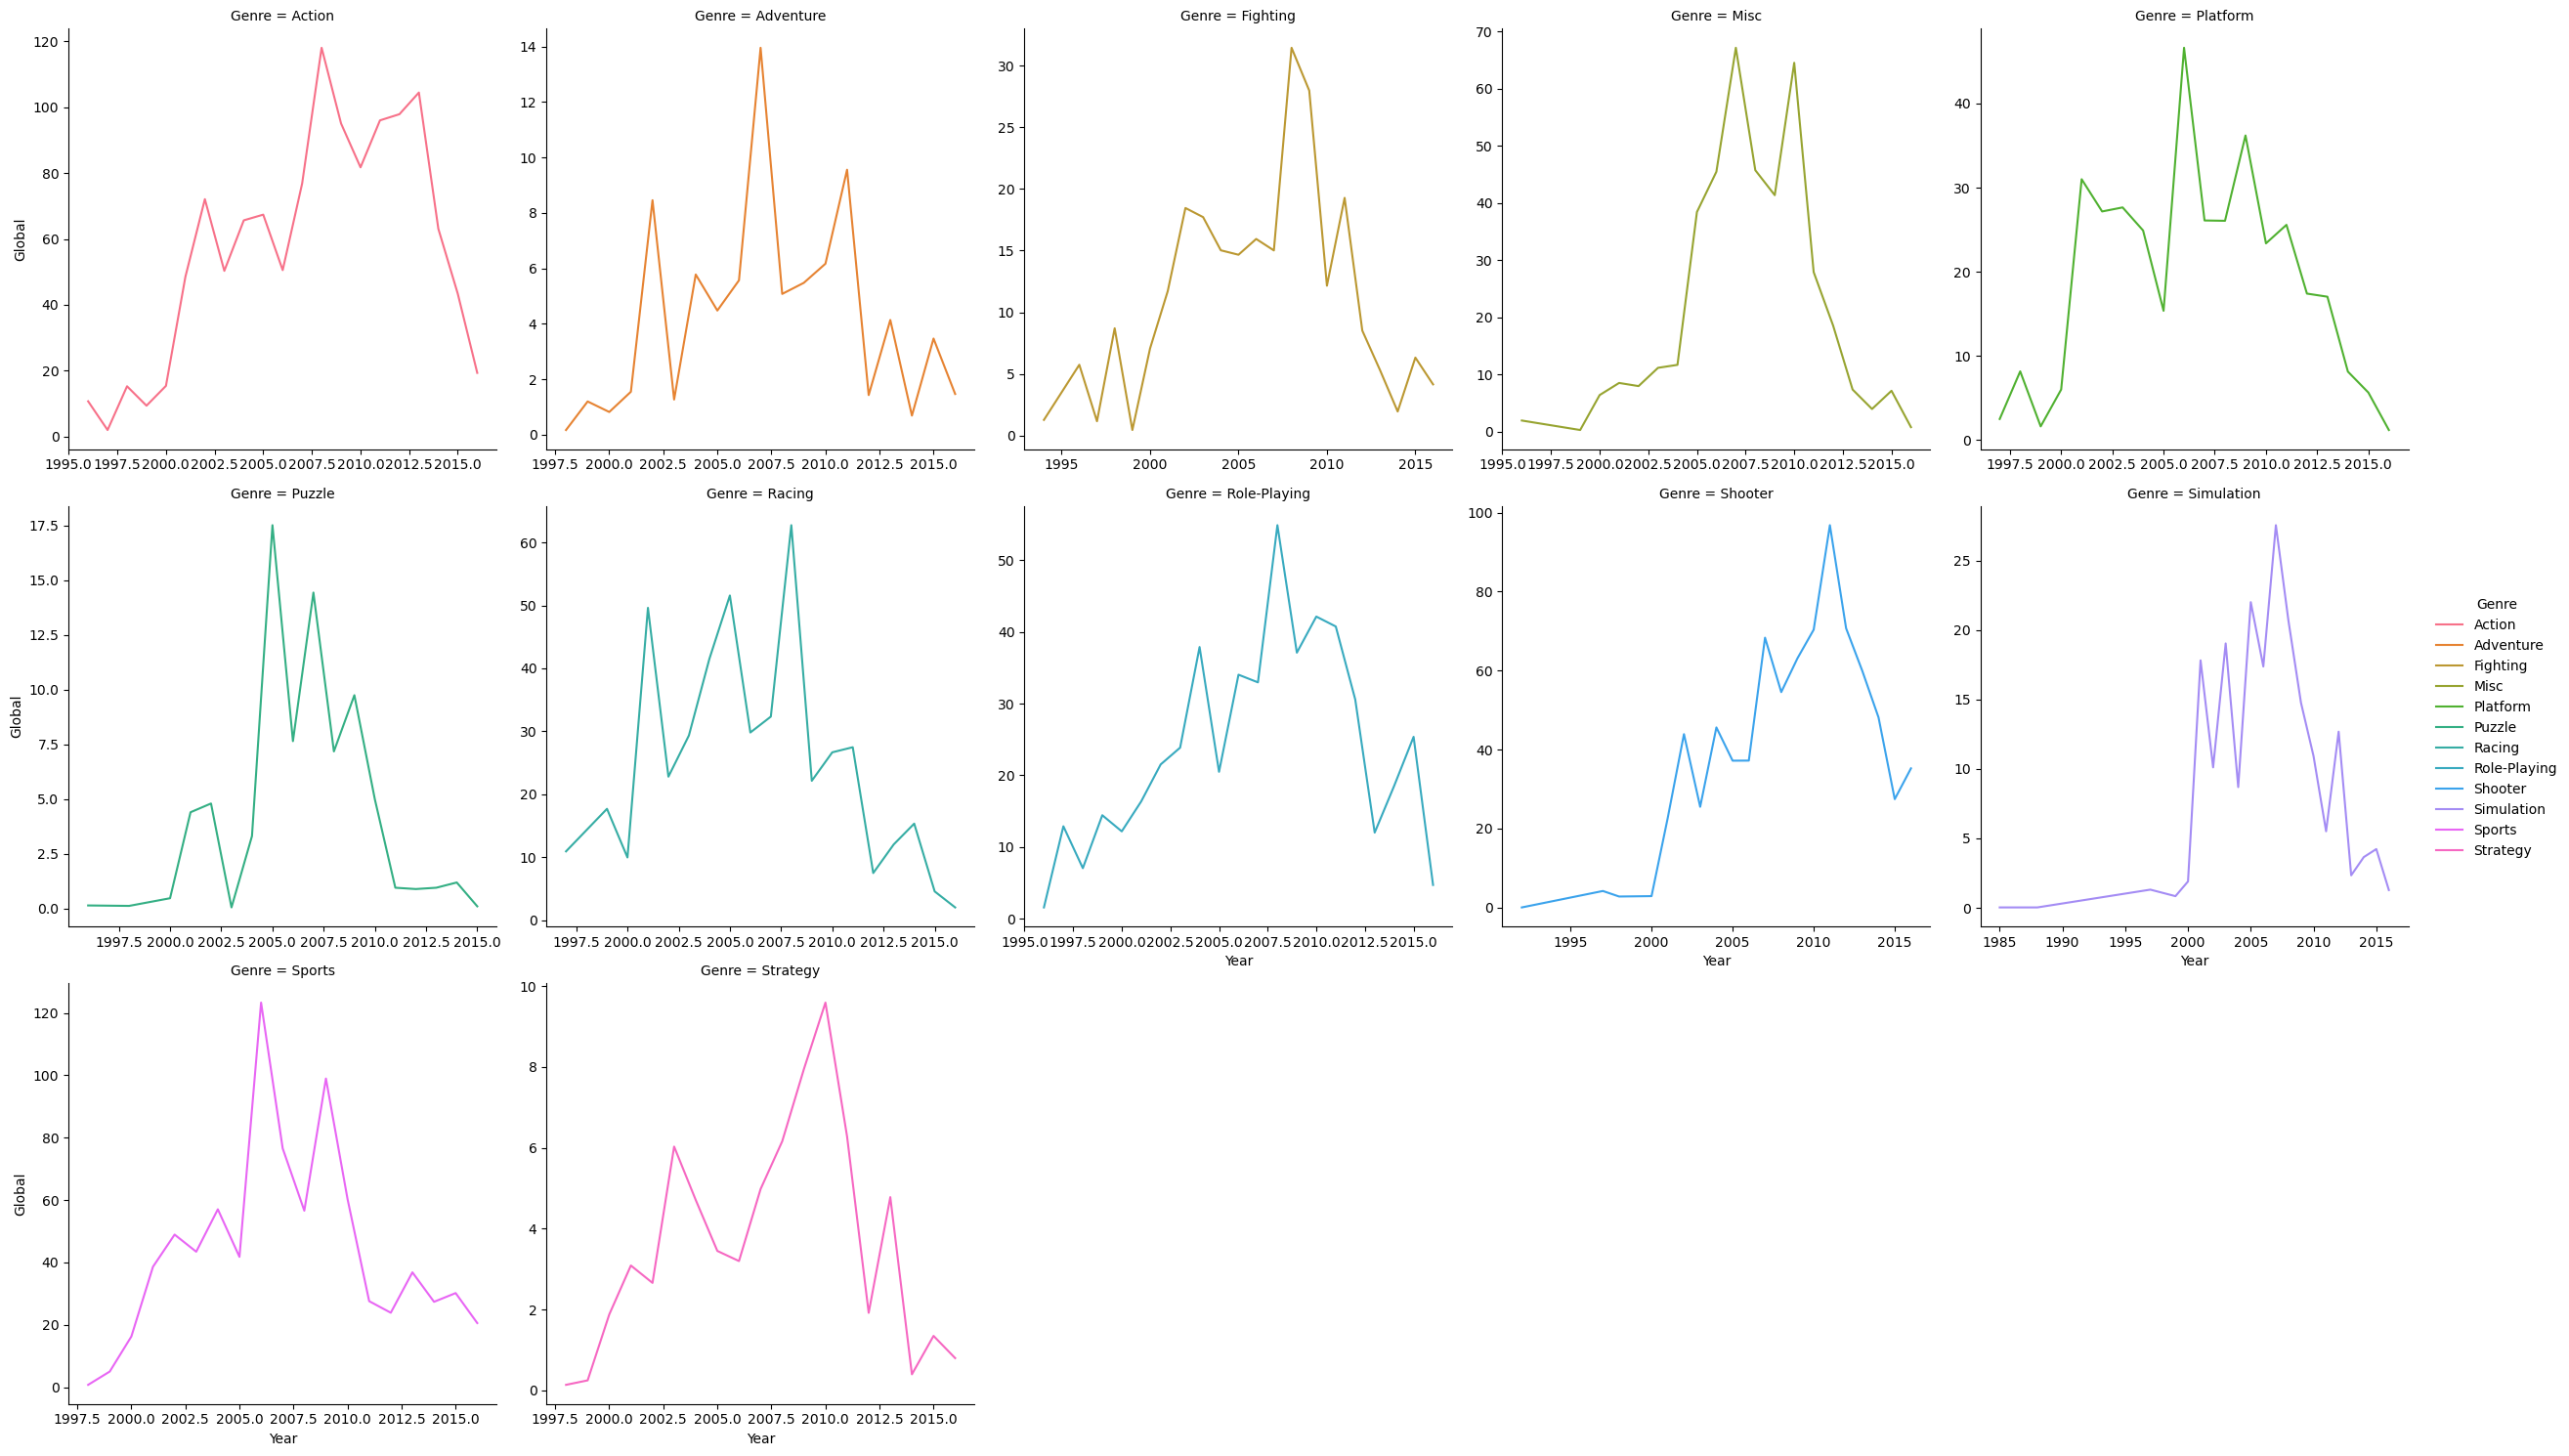

In [118]:

sns.relplot(data=a,  x="Year", y = 'Global',hue = 'Genre', col = 'Genre',kind = 'line', col_wrap=5,facet_kws={"sharex": False, "sharey": False} )


In [75]:
a

,Genre,Year,Global
0,Action,1996.0,10.71
1,Action,1997.0,1.99
2,Action,1998.0,15.27
3,Action,1999.0,9.38
4,Action,2000.0,15.40
...,...,...,...
233,Strategy,2012.0,1.92
234,Strategy,2013.0,4.78
235,Strategy,2014.0,0.40
236,Strategy,2015.0,1.35


In [76]:
a_1 = df.groupby(['Platform','Year'])[['Global']].sum().reset_index()

C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

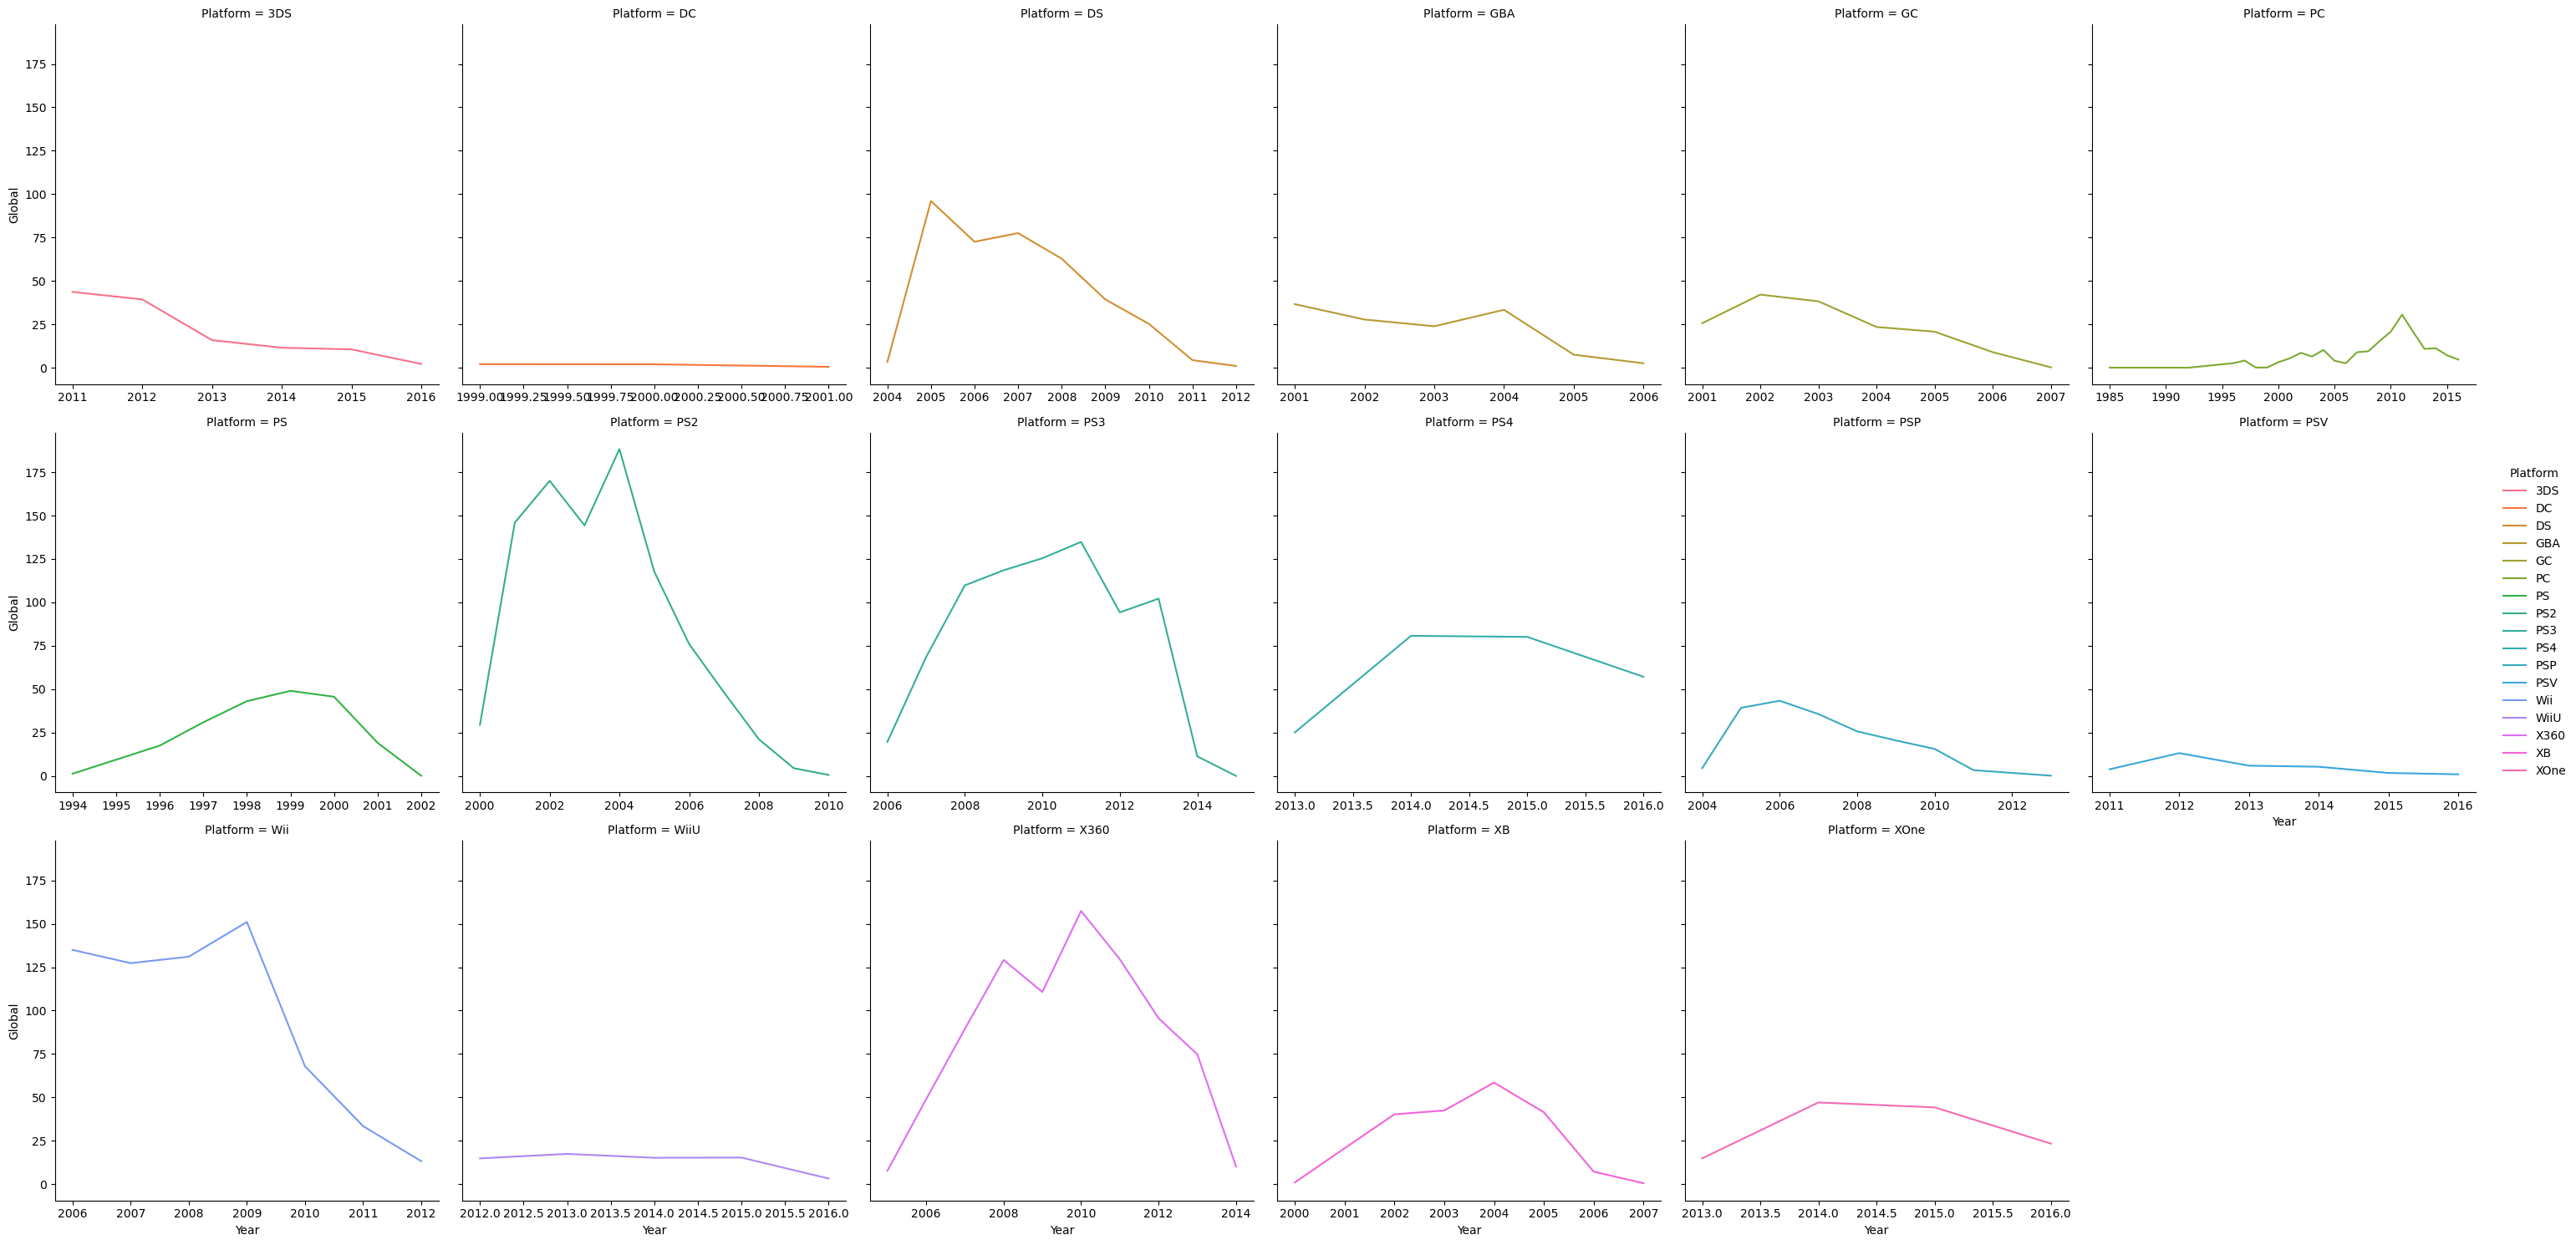

In [119]:
sns.relplot(data=a_1,  x="Year", y = 'Global', col = 'Platform', hue = 'Platform',kind = 'line', col_wrap=6, facet_kws=dict(sharex=False))

In [79]:
print(a_1['Platform'].value_counts())

Platform
PC      24
PS2     11
PS3     10
X360    10
DS       9
PSP      9
XB       8
PS       8
GC       7
Wii      7
PSV      6
3DS      6
GBA      6
WiiU     5
PS4      4
XOne     4
DC       3
Name: count, dtype: int64


In [80]:
a,a_1

(        Genre    Year  Global
 0      Action  1996.0   10.71
 1      Action  1997.0    1.99
 2      Action  1998.0   15.27
 3      Action  1999.0    9.38
 4      Action  2000.0   15.40
 ..        ...     ...     ...
 233  Strategy  2012.0    1.92
 234  Strategy  2013.0    4.78
 235  Strategy  2014.0    0.40
 236  Strategy  2015.0    1.35
 237  Strategy  2016.0    0.80
 
 [238 rows x 3 columns],
     Platform    Year  Global
 0        3DS  2011.0   43.68
 1        3DS  2012.0   39.37
 2        3DS  2013.0   15.90
 3        3DS  2014.0   11.52
 4        3DS  2015.0   10.58
 ..       ...     ...     ...
 132       XB  2007.0    0.55
 133     XOne  2013.0   14.90
 134     XOne  2014.0   47.07
 135     XOne  2015.0   44.24
 136     XOne  2016.0   23.36
 
 [137 rows x 3 columns])

In [81]:
b = df[['Year','NA', 'EU', 'JP', 'Other']]
b1= df.groupby(['Year','Genre'])[['NA', 'EU', 'JP', 'Other']].sum().reset_index()
b2 = pd.melt(b1, id_vars = ['Year','Genre'],var_name = 'Region', value_name = 'Sales')

In [82]:
b2

,Year,Genre,Region,Sales
0,1985.0,Simulation,NA,0.00
1,1988.0,Simulation,NA,0.00
2,1992.0,Shooter,NA,0.02
3,1994.0,Fighting,NA,0.39
4,1996.0,Action,NA,5.30
...,...,...,...,...
947,2016.0,Role-Playing,Other,0.52
948,2016.0,Shooter,Other,4.63
949,2016.0,Simulation,Other,0.12
950,2016.0,Sports,Other,2.75


C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

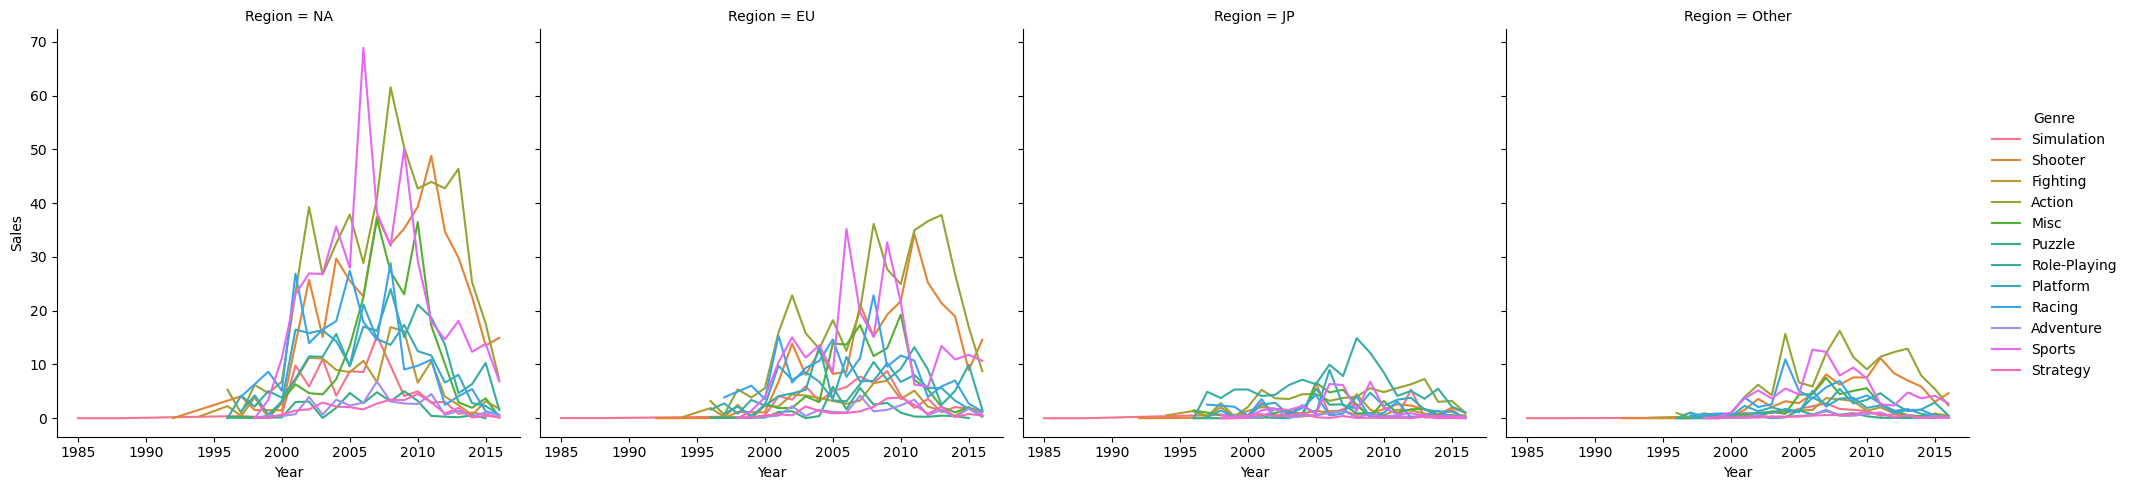

In [84]:
sns.relplot(x = 'Year', y = 'Sales', data = b2, hue = 'Genre', col = 'Region', kind='line')

In [52]:
genre = df[['Genre', 'Global']]
genre

,Genre,Global
0,Sports,82.53
1,Platform,40.24
2,Racing,35.52
3,Sports,32.77
4,Role-Playing,31.37
...,...,...
16714,Action,0.01
16715,Sports,0.01
16716,Adventure,0.01
16717,Platform,0.01


In [53]:
gr_genre = genre.groupby(['Genre'])[['Global']].sum().reset_index()

In [54]:
top_genre = gr_genre.groupby('Genre')['Global'].sum().sort_values(ascending=False).head(5).index


In [55]:
top_genre

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'], dtype='object', name='Genre')

In [56]:
b2 = b2[b2['Genre'].isin(top_genre)]

In [57]:
b2

,Year,Genre,Region,Sales
0,1980.0,Action,NA,0.32
3,1980.0,Shooter,NA,6.56
4,1980.0,Sports,NA,0.46
5,1981.0,Action,NA,13.86
6,1981.0,Platform,NA,6.47
...,...,...,...,...
1552,2016.0,Role-Playing,Other,1.40
1553,2016.0,Shooter,Other,5.02
1555,2016.0,Sports,Other,3.02
1557,2017.0,Action,Other,0.00


C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

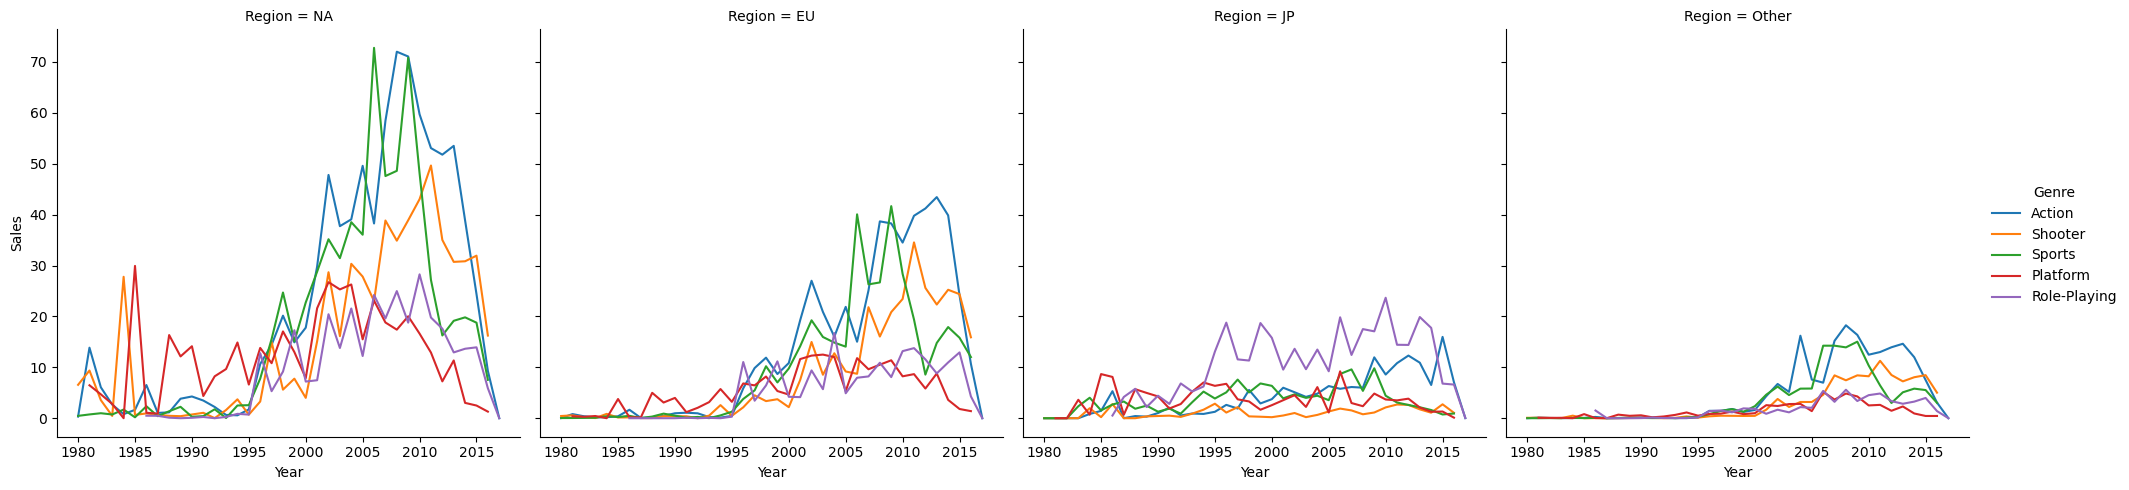

In [59]:
sb.relplot(x = 'Year', y = 'Sales', data = b2, hue = 'Genre', col = 'Region', kind='line')

In [60]:
cr = df[['Critic_Score', 'Genre','NA', 'EU', 'JP', 'Other']]
cr

,Critic_Score,Genre,NA,EU,JP,Other
0,7.6,Sports,41.36,28.96,3.77,8.45
1,NaN,Platform,29.08,3.58,6.81,0.77
2,8.2,Racing,15.68,12.76,3.79,3.29
3,8.0,Sports,15.61,10.93,3.28,2.95
4,NaN,Role-Playing,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...
16714,NaN,Action,0.00,0.00,0.01,0.00
16715,NaN,Sports,0.00,0.01,0.00,0.00
16716,NaN,Adventure,0.00,0.00,0.01,0.00
16717,NaN,Platform,0.01,0.00,0.00,0.00


In [61]:
critic = cr.melt( id_vars = ['Critic_Score','Genre'],var_name = 'Region', value_name = 'Sales')

In [62]:
critic

,Critic_Score,Genre,Region,Sales
0,7.6,Sports,NA,41.36
1,NaN,Platform,NA,29.08
2,8.2,Racing,NA,15.68
3,8.0,Sports,NA,15.61
4,NaN,Role-Playing,NA,11.27
...,...,...,...,...
66863,NaN,Action,Other,0.00
66864,NaN,Sports,Other,0.00
66865,NaN,Adventure,Other,0.00
66866,NaN,Platform,Other,0.00


In [63]:
top_genre

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'], dtype='object', name='Genre')

In [64]:
gr_genre

,Genre,Global
0,Action,1745.27
1,Adventure,237.69
2,Fighting,447.48
3,Misc,803.18
4,Platform,828.08
5,Puzzle,243.02
6,Racing,728.90
7,Role-Playing,934.40
8,Shooter,1052.94
9,Simulation,390.42


In [65]:
critic = critic[critic['Genre'].isin(top_genre)]

In [66]:
sc2 = critic.groupby(['Region','Genre','Critic_Score'])[['Sales']].sum().reset_index()

In [67]:
sc2

,Region,Genre,Critic_Score,Sales
0,EU,Action,1.9,0.00
1,EU,Action,2.0,0.00
2,EU,Action,2.3,0.00
3,EU,Action,2.4,0.03
4,EU,Action,2.5,0.02
...,...,...,...,...
1359,Other,Sports,9.3,1.52
1360,Other,Sports,9.4,1.77
1361,Other,Sports,9.5,0.58
1362,Other,Sports,9.7,0.48


C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

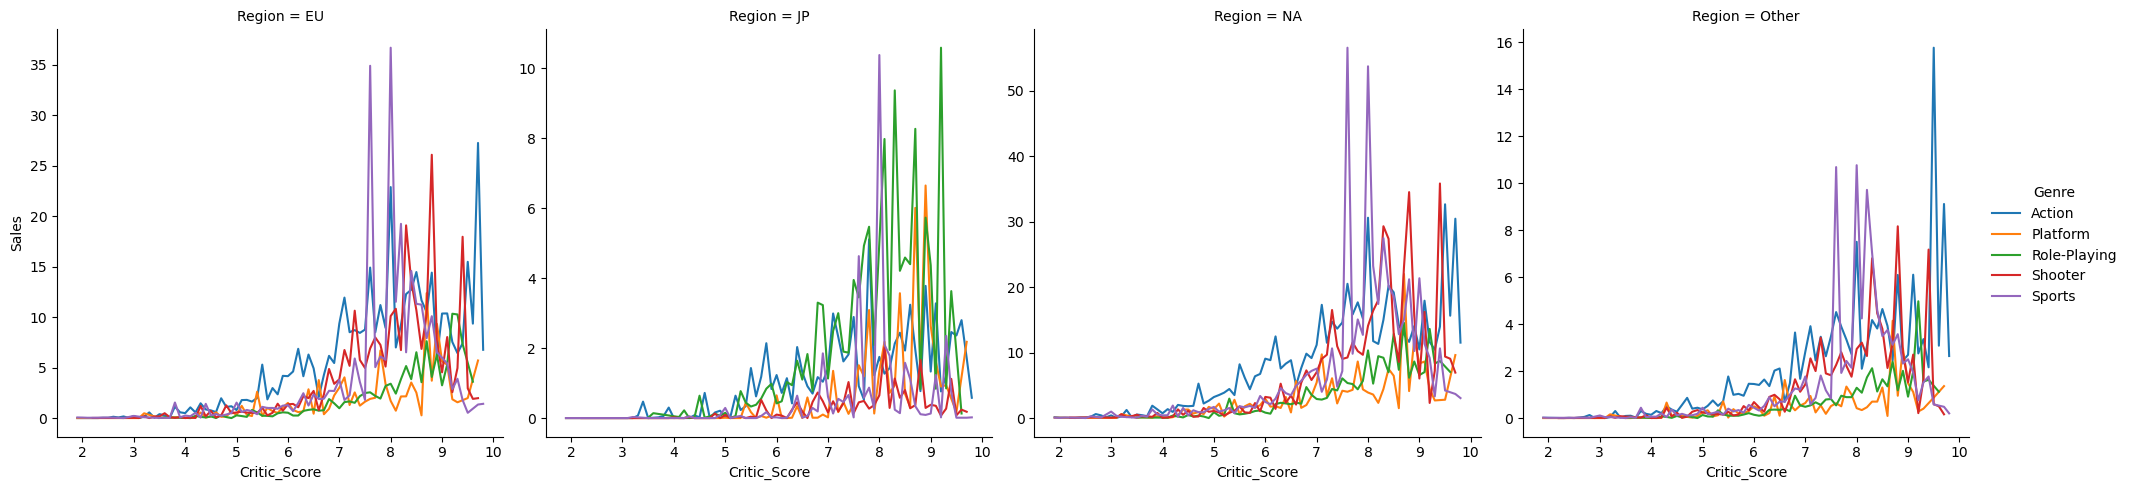

In [68]:
crit = sb.relplot(data = sc2, x = 'Critic_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})

In [69]:
user = df[['User_Score', 'Genre','NA', 'EU', 'JP', 'Other']]
user

,User_Score,Genre,NA,EU,JP,Other
0,8,Sports,41.36,28.96,3.77,8.45
1,NaN,Platform,29.08,3.58,6.81,0.77
2,8.3,Racing,15.68,12.76,3.79,3.29
3,8,Sports,15.61,10.93,3.28,2.95
4,NaN,Role-Playing,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...
16714,NaN,Action,0.00,0.00,0.01,0.00
16715,NaN,Sports,0.00,0.01,0.00,0.00
16716,NaN,Adventure,0.00,0.00,0.01,0.00
16717,NaN,Platform,0.01,0.00,0.00,0.00


In [70]:
user = user.melt( id_vars = ['User_Score','Genre'],var_name = 'Region', value_name = 'Sales')



C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

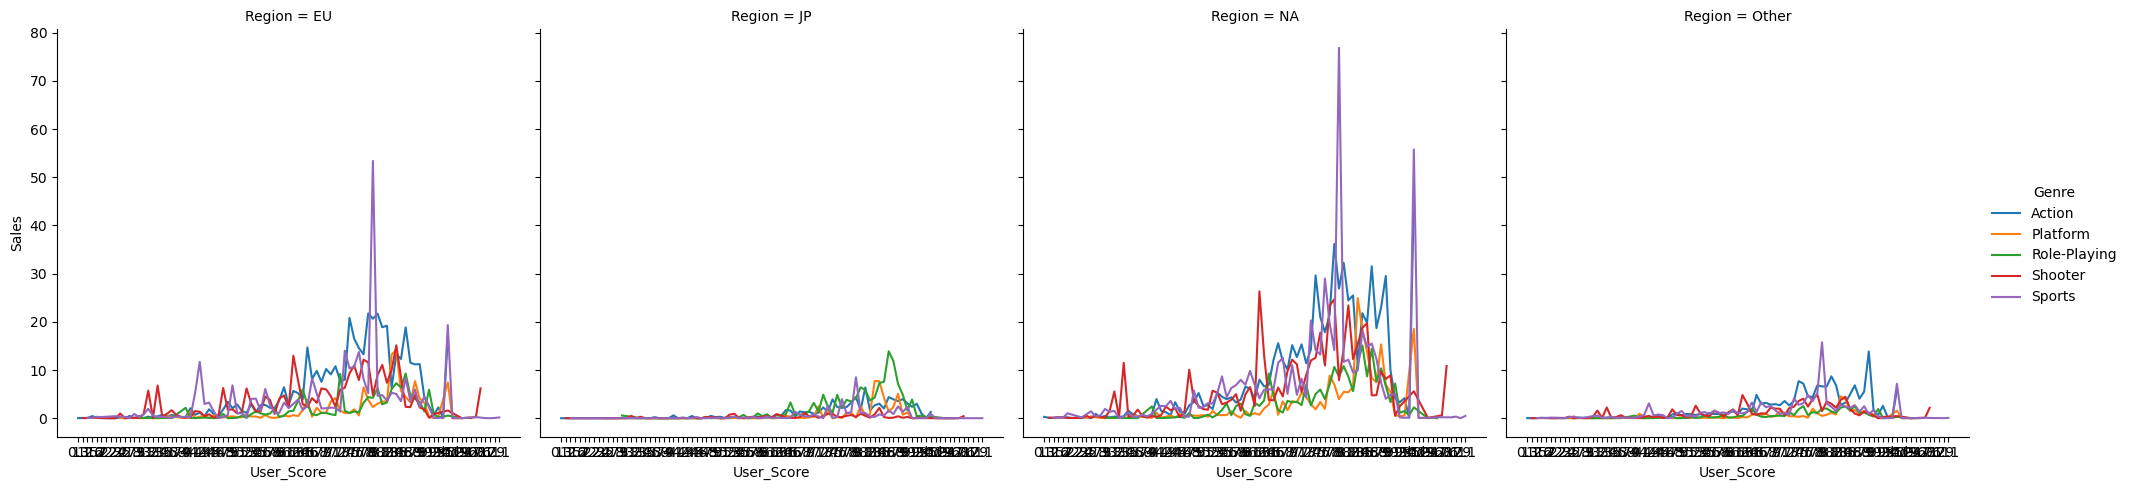

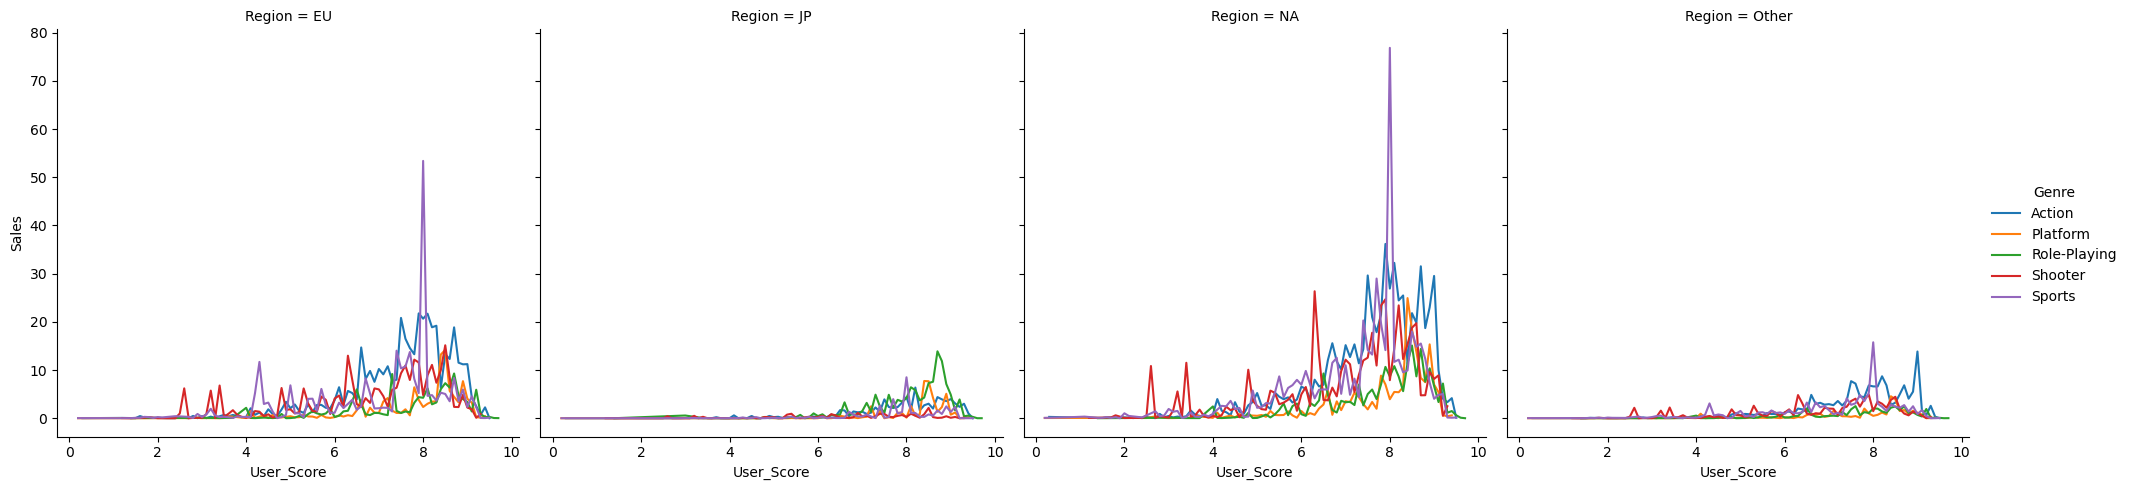

In [71]:
user = user[user['Genre'].isin(top_genre)]
user_sc = user.groupby(['Region','Genre','User_Score'])[['Sales']].sum().reset_index()

us = sb.relplot(data = user_sc, x = 'User_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line')
user_sc['User_Score'] = pd.to_numeric(user_sc['User_Score'], errors='coerce')
us = sb.relplot(data = user_sc, x = 'User_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line')


In [97]:
critic_sales = df[['Year', 'Global', 'Name', 'Critic_Score']]

In [106]:
critic_sales.head(20)

Global
Year   Name                               Critic_Score        
1985.0 Alter Ego                          5.9             0.03
1988.0 SimCity                            6.4             0.03
1992.0 Doom                               8.5             0.03
1994.0 Battle Arena Toshinden             6.9             1.27
1996.0 Diablo                             9.4             1.59
       PaRappa The Rapper                 9.2             1.92
       Resident Evil                      9.1             5.05
       Super Puzzle Fighter II Turbo      8.3             0.14
       Tekken 2                           8.9             5.74
       Tomb Raider                        8.6             1.03
                                          9.1             4.63
       WipEout XL                         9.3             0.25
1997.0 Ace Combat 2                       8.3             0.89
       Alundra                            8.6             0.23
       Bushido Blade                      8.3             1.16
       Castlevania: Symphony of the Night 9.3             1.27
       Colony Wars                        9.1             0.42
       Elemental Gearbolt                 7.6             0.06
       Final Fantasy Tactics              8.3             2.45
       Final Fantasy VII                  9.2             9.72

In [107]:
critic_sales_max = critic_sales[
    critic_sales.groupby('Year')['Global'].transform('max') == critic_sales['Global']
]

In [108]:
critic_sales_max

,,,Global
Year,Name,Critic_Score,
1985.0,Alter Ego,5.9,0.03
1988.0,SimCity,6.4,0.03
1992.0,Doom,8.5,0.03
1994.0,Battle Arena Toshinden,6.9,1.27
1996.0,Tekken 2,8.9,5.74
1997.0,Gran Turismo,9.6,10.95
1998.0,Tekken 3,9.6,7.16
1999.0,Gran Turismo 2,9.3,9.49
2000.0,Final Fantasy IX,9.4,5.30


In [102]:
user_sales = df[['Year', 'Global', 'Name', 'User_Score']]

In [109]:
user_sales_max = user_sales[
    user_sales.groupby('Year')['Global'].transform('max') == user_sales['Global']
]

In [110]:
user_sales_max

,Year,Global,Name,User_Score
0,2006.0,82.53,Wii Sports,8
1,1985.0,40.24,Super Mario Bros.,NaN
2,2008.0,35.52,Mario Kart Wii,8.3
3,2009.0,32.77,Wii Sports Resort,8
4,1996.0,31.37,Pokemon Red/Pokemon Blue,NaN
5,1989.0,30.26,Tetris,NaN
9,1984.0,28.31,Duck Hunt,NaN
10,2005.0,24.67,Nintendogs,NaN
12,1999.0,23.10,Pokemon Gold/Pokemon Silver,NaN
13,2007.0,22.70,Wii Fit,7.7


C:\Users\ystfn\AppData\Local\Temp\ipykernel_24016\1275181053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_sales["User_Score"] = pd.to_numeric(user_sales["User_Score"], errors="coerce")
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


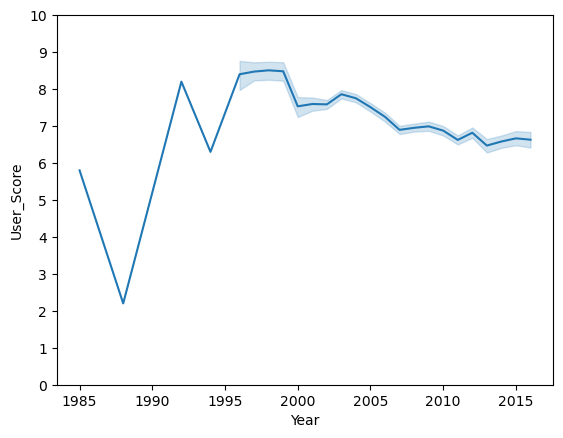

In [116]:
user_sales["User_Score"] = pd.to_numeric(user_sales["User_Score"], errors="coerce")
ax = sb.lineplot(data=user_sales, x="Year", y="User_Score")
ax.set_yticks(range(0, 11))


C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


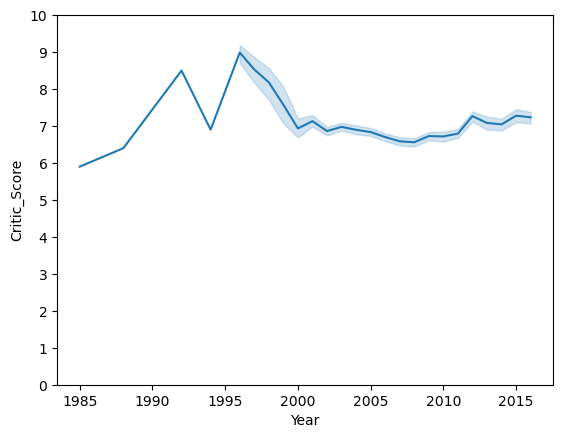

In [130]:
ax = sb.lineplot(data=critic_sales, x="Year", y="Critic_Score")
ax.set_yticks(range(0, 11))

C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


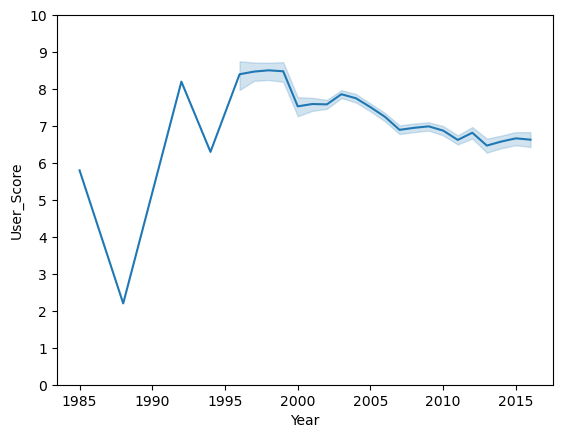

In [131]:
ax = sb.lineplot(data=user_sales, x="Year", y="User_Score")
ax.set_yticks(range(0, 11))
